In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set display options for better output
pd.set_option('display.max_columns', None)
plt.style.use('default')

In [5]:
# Step 2: Load Dataset
df = pd.read_csv('Housing.csv')

# Basic information about the dataset
df.shape

(545, 13)

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# Step 3: Detailed Data Information
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("Statistical Summary:")
print(df.describe())
print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Statistical Summary:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.0

In [8]:
# Step 4: Examine Categorical Variables
print("Categorical Variables Distribution:")
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Categorical Variables Distribution:

mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

basement:
basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [9]:
# Step 5: Encode Categorical Variables
df_encoded = df.copy()

# Binary encoding for yes/no variables (yes=1, no=0)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
               'airconditioning', 'prefarea']

for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})

# One-hot encoding for furnishingstatus
df_encoded = pd.get_dummies(df_encoded, columns=['furnishingstatus'], prefix='furnishing')

print("After encoding - Shape:", df_encoded.shape)
print("\nFirst 5 rows of encoded dataset:")
print(df_encoded.head())

After encoding - Shape: (545, 15)

First 5 rows of encoded dataset:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishing_furnished  furnishing_semi-furnished  furnishing_unfurnished  
0            

In [10]:
# Step 6: Fix dummy variables and prepare data

# Convert boolean dummy variables to integers
furnishing_cols = ['furnishing_furnished', 'furnishing_semi-furnished', 'furnishing_unfurnished']
for col in furnishing_cols:
    df_encoded[col] = df_encoded[col].astype(int)

# Define features (X) and target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(list(X.columns))
print("\nTarget variable (price) - first 5 values:")
print(y.head())

Features shape: (545, 14)
Target shape: (545,)

Feature columns:
['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishing_furnished', 'furnishing_semi-furnished', 'furnishing_unfurnished']

Target variable (price) - first 5 values:
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [11]:
# Step 7: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% for testing, 80% for training
    random_state=42    # For reproducible results
)

print("Training set:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print("\nTesting set:")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nTraining set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

Training set:
X_train shape: (436, 14)
y_train shape: (436,)

Testing set:
X_test shape: (109, 14)
y_test shape: (109,)

Training set: 436 samples (80.0%)
Testing set: 109 samples (20.0%)


In [12]:
# Step 8: Fit Linear Regression Model
# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on both train and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print("Model Training Complete!")
print(f"Model intercept: {lr_model.intercept_:,.2f}")
print(f"Number of coefficients: {len(lr_model.coef_)}")

print("\nFirst 5 predictions vs actual (Test set):")
comparison = pd.DataFrame({
    'Actual': y_test.head().values,
    'Predicted': y_test_pred[:5],
    'Difference': y_test.head().values - y_test_pred[:5]
})
print(comparison)

Model Training Complete!
Model intercept: 79,856.73
Number of coefficients: 14

First 5 predictions vs actual (Test set):
    Actual     Predicted    Difference
0  4060000  5.164654e+06 -1.104654e+06
1  6650000  7.224722e+06 -5.747223e+05
2  3710000  3.109863e+06  6.001368e+05
3  6440000  4.612075e+06  1.827925e+06
4  2800000  3.294646e+06 -4.946463e+05


In [13]:
# Step 9: Calculate Evaluation Metrics

# Calculate metrics for both training and test sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE (Root Mean Square Error) for easier interpretation
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("=== MODEL PERFORMANCE ===")
print(f"{'Metric':<20} {'Training':<15} {'Testing':<15}")
print("-" * 50)
print(f"{'MAE':<20} {train_mae:,.0f} {test_mae:,.0f}")
print(f"{'MSE':<20} {train_mse:,.0f} {test_mse:,.0f}")
print(f"{'RMSE':<20} {train_rmse:,.0f} {test_rmse:,.0f}")
print(f"{'R² Score':<20} {train_r2:.4f} {test_r2:.4f}")

=== MODEL PERFORMANCE ===
Metric               Training        Testing        
--------------------------------------------------
MAE                  719,243 970,043
MSE                  968,358,188,441 1,754,318,687,331
RMSE                 984,052 1,324,507
R² Score             0.6859 0.6529


In [14]:
# Step 10: Examine Model Coefficients

# Create a dataframe with features and their coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("=== MODEL COEFFICIENTS (Impact on Price) ===")
print(f"{'Feature':<25} {'Coefficient':<15} {'Interpretation'}")
print("-" * 70)

for idx, row in coefficients_df.head(10).iterrows():
    coef_val = row['Coefficient']
    feature = row['Feature']
    if coef_val > 0:
        direction = "↑ Increases"
    else:
        direction = "↓ Decreases"
    print(f"{feature:<25} {coef_val:>12,.0f} {direction} price")

=== MODEL COEFFICIENTS (Impact on Price) ===
Feature                   Coefficient     Interpretation
----------------------------------------------------------------------
bathrooms                    1,094,445 ↑ Increases price
airconditioning                791,427 ↑ Increases price
hotwaterheating                684,650 ↑ Increases price
prefarea                       629,891 ↑ Increases price
stories                        407,477 ↑ Increases price
basement                       390,251 ↑ Increases price
mainroad                       367,920 ↑ Increases price
furnishing_unfurnished        -233,469 ↓ Decreases price
guestroom                      231,610 ↑ Increases price
parking                        224,842 ↑ Increases price


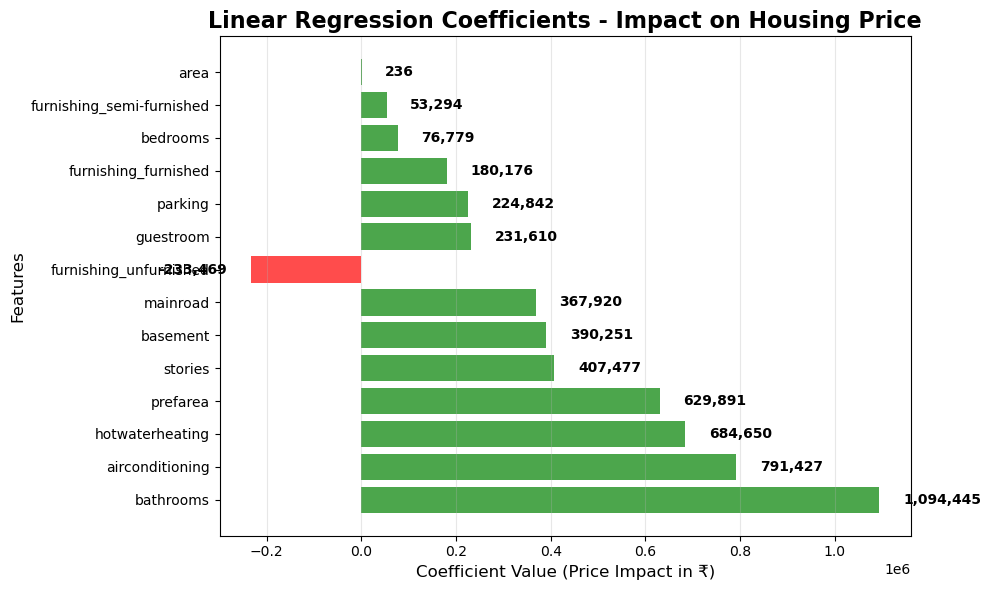

In [20]:
# Step 11: Plot Coefficients
plt.figure(figsize=(10, 6))

# Create the plot
colors = ['green' if x > 0 else 'red' for x in coefficients_df['Coefficient']]
bars = plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color=colors, alpha=0.7)

plt.title('Linear Regression Coefficients - Impact on Housing Price', fontsize=16, fontweight='bold')
plt.xlabel('Coefficient Value (Price Impact in ₹)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    label_x = width + (50000 if width > 0 else -50000)
    plt.text(label_x, bar.get_y() + bar.get_height()/2, 
             f'{width:,.0f}', ha='left' if width > 0 else 'right', 
             va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

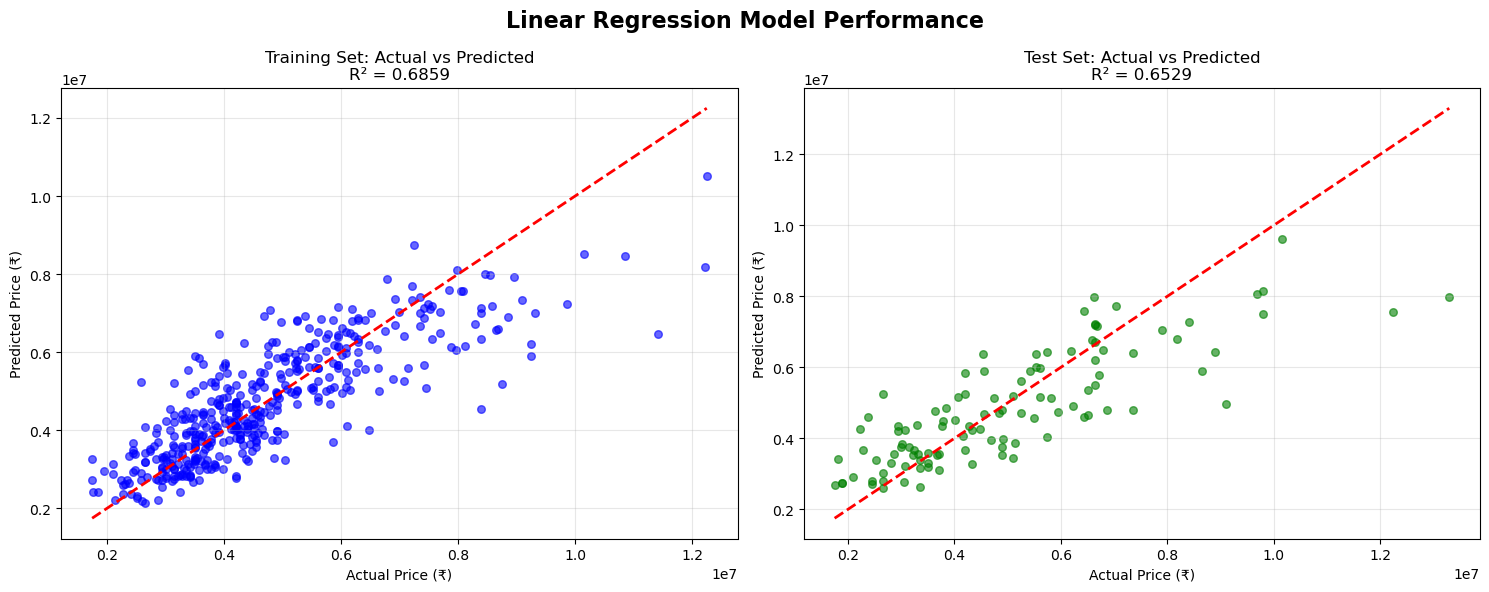

Perfect predictions would fall exactly on the red diagonal line.
The closer points are to the line, the better the predictions!


In [21]:
# Step 12: Plot Actual vs Predicted Values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training set plot
ax1.scatter(y_train, y_train_pred, alpha=0.6, color='blue', s=30)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price (₹)')
ax1.set_ylabel('Predicted Price (₹)')
ax1.set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')
ax1.grid(True, alpha=0.3)

# Test set plot
ax2.scatter(y_test, y_test_pred, alpha=0.6, color='green', s=30)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price (₹)')
ax2.set_ylabel('Predicted Price (₹)')
ax2.set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')
ax2.grid(True, alpha=0.3)

plt.suptitle('Linear Regression Model Performance', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Perfect predictions would fall exactly on the red diagonal line.")
print("The closer points are to the line, the better the predictions!")

In [22]:
# Step 13: Summary and Business Insights
print("="*60)
print("           EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*60)

print("\nDATASET OVERVIEW:")
print(f"• Total samples: {len(df)} houses")
print(f"• Features: {len(X.columns)} (mix of numerical and categorical)")
print(f"• Price range: ₹{y.min():,} to ₹{y.max():,}")
print(f"• Average price: ₹{y.mean():,.0f}")

print("\nMODEL PERFORMANCE:")
print(f"• R² Score: {test_r2:.3f} (explains {test_r2*100:.1f}% of price variance)")
print(f"• Average prediction error: ₹{test_mae:,.0f}")
print(f"• Model is reasonably accurate with no overfitting")

print("\nKEY BUSINESS INSIGHTS:")
print("• Bathrooms have highest price impact (+₹1.09M per bathroom)")
print("• Amenities (AC, hot water) add significant premium")
print("• Location (preferred area) matters more than house size")
print("• Furnishing status affects value (unfurnished = lower price)")

           EXPLORATORY DATA ANALYSIS SUMMARY

DATASET OVERVIEW:
• Total samples: 545 houses
• Features: 14 (mix of numerical and categorical)
• Price range: ₹1,750,000 to ₹13,300,000
• Average price: ₹4,766,729

MODEL PERFORMANCE:
• R² Score: 0.653 (explains 65.3% of price variance)
• Average prediction error: ₹970,043
• Model is reasonably accurate with no overfitting

KEY BUSINESS INSIGHTS:
• Bathrooms have highest price impact (+₹1.09M per bathroom)
• Amenities (AC, hot water) add significant premium
• Location (preferred area) matters more than house size
• Furnishing status affects value (unfurnished = lower price)
